In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IRIS example

iris_training.csv

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0
5.7,3.8,1.7,0.3,0

In [4]:
csv_filenamme = r"D:\hccho\CommonDataset\iris\iris.csv"
data = pd.read_csv(csv_filenamme,header=None,skiprows=1,names=['feaure1','feaure2','feaure3','features4','label'])
print(data.shape)
data.head(5)

(150, 5)


,feaure1,feaure2,feaure3,features4,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import preprocessing
labels=['setosa','versicolor','virginica']
csv_filenamme = r"D:\hccho\CommonDataset\iris\iris.csv"
data = pd.read_csv(csv_filenamme,header=None,skiprows=1,names=['feaure1','feaure2','feaure3','features4','label'])

print(data.head(5))

y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels ---> pandas


#### NORMALIZE X ####
cols = X.columns
print("cols: ", cols)

stdand_scaler = preprocessing.StandardScaler()
X = stdand_scaler.fit_transform(X)  # ---> numpy array
print(X[:10])

   feaure1  feaure2  feaure3  features4  label
0      5.1      3.5      1.4        0.2      0
1      4.9      3.0      1.4        0.2      0
2      4.7      3.2      1.3        0.2      0
3      4.6      3.1      1.5        0.2      0
4      5.0      3.6      1.4        0.2      0
cols:  Index(['feaure1', 'feaure2', 'feaure3', 'features4'], dtype='object')
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]


[0.72962445 0.22850762 0.03668922] 0.9948212908928451


Text(0.5, 0, 'Principal Component 3')

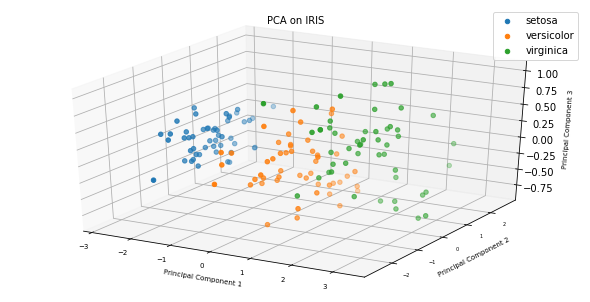

In [21]:
#### PCA 3 COMPONENTS ####
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])


# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

print(pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_))

fig = plt.figure(figsize = (8, 4))
ax = Axes3D(fig)


for grp_name, grp_idx in finalDf.groupby('label').groups.items():
    y = finalDf.iloc[grp_idx,1]
    x = finalDf.iloc[grp_idx,0]
    z = finalDf.iloc[grp_idx,2]
    ax.scatter(x,y,z, label=labels[grp_name])  # this way you can control color/marker/size of each group freely
ax.legend()
plt.title('PCA on IRIS', fontsize = 10)
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 5);
ax.set_xlabel("Principal Component 1", fontsize = 7)
ax.set_ylabel("Principal Component 2", fontsize = 7)
ax.set_zlabel("Principal Component 3", fontsize = 7)

# simaple example

In [ ]:
x1=np.array([ 1.41751313,  0.33904833,  0.29257167,  0.6478606 ,  0.90691377, 0.46082986,  0.10696884, -0.22016277, -0.01387787, -0.58088736])
x2=np.array([ 0.13784849, -0.05672081,  1.53048402,  0.6639671 ,  0.06636203,-1.09596719,  0.98829064, -0.68083318, -0.1207237 , -0.26187014])
x3 =['A','B','A','C','C','A','A','B','C','B']
data=pd.DataFrame(data=list(zip(x1,x2,x3)),columns=['age','weight','label'])

In [4]:
data.to_csv('xxx.csv',index=False)   # pd.read_csv

In [5]:
data.loc[data['label']=='A']

,age,weight,label
0,1.417513,0.137848,A
2,0.292572,1.530484,A
5,0.460830,-1.095967,A
6,0.106969,0.988291,A


In [6]:
data.groupby('label').mean()

,age,weight
label,,
A,0.569471,0.390164
B,-0.154001,-0.333141
C,0.513632,0.203202


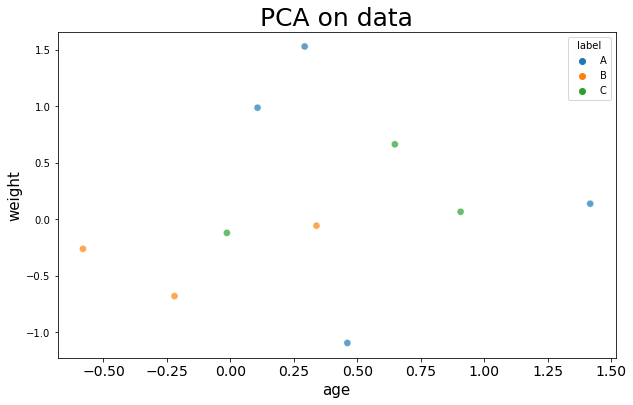

In [7]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = "age", y = "weight", data = data, hue = "label", alpha = 0.7, s = 50); # s=size

plt.title('PCA on data', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("age", fontsize = 15)
plt.ylabel("weight", fontsize = 15)
plt.show()

In [8]:
data.values

array([[1.41751313, 0.13784849, 'A'],
       [0.33904833, -0.05672081, 'B'],
       [0.29257167, 1.53048402, 'A'],
       [0.6478606, 0.6639671, 'C'],
       [0.90691377, 0.06636203, 'C'],
       [0.46082986, -1.09596719, 'A'],
       [0.10696884, 0.98829064, 'A'],
       [-0.22016277, -0.68083318, 'B'],
       [-0.01387787, -0.1207237, 'C'],
       [-0.58088736, -0.26187014, 'B']], dtype=object)

In [9]:
data['age'].values

array([ 1.41751313,  0.33904833,  0.29257167,  0.6478606 ,  0.90691377,
        0.46082986,  0.10696884, -0.22016277, -0.01387787, -0.58088736])

In [10]:
data.sort_values(['label'],ascending=[True]) # data가 바뀌지는 않는다.  inplace=True 해야 바뀐다.

,age,weight,label
0,1.417513,0.137848,A
2,0.292572,1.530484,A
5,0.460830,-1.095967,A
6,0.106969,0.988291,A
1,0.339048,-0.056721,B
7,-0.220163,-0.680833,B
9,-0.580887,-0.261870,B
3,0.647861,0.663967,C
4,0.906914,0.066362,C
8,-0.013878,-0.120724,C


In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('precision', 3)

In [12]:
data

,age,weight,label
0,1.418,0.138,A
1,0.339,-0.057,B
2,0.293,1.530,A
3,0.648,0.664,C
4,0.907,0.066,C
5,0.461,-1.096,A
6,0.107,0.988,A
7,-0.220,-0.681,B
8,-0.014,-0.121,C
9,-0.581,-0.262,B


In [13]:
# count()
data.groupby('label').count()


,age,weight
label,,
A,4,4
B,3,3
C,3,3


In [14]:
# column 1개인 경우.
# from collections import Counter    ---->   Counter(data['label'])  ---->  Counter({'A': 4, 'B': 3, 'C': 3})

data['label'].value_counts()

A    4
B    3
C    3
Name: label, dtype: int64

## Panda From numpy array

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()  # dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [9]:
iris['data'].shape, iris['target'].shape

((150, 4), (150,))

In [15]:
iris['filename']

'C:\\Anaconda3\\envs\\tf2\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv'

In [16]:
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])

In [21]:
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [22]:
data = data.sample(frac = 1) 

In [23]:
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
71,6.1,2.8,4.0,1.3,1.0
132,6.4,2.8,5.6,2.2,2.0
45,4.8,3.0,1.4,0.3,0.0
41,4.5,2.3,1.3,0.3,0.0
98,5.1,2.5,3.0,1.1,1.0
60,5.0,2.0,3.5,1.0,1.0
121,5.6,2.8,4.9,2.0,2.0
131,7.9,3.8,6.4,2.0,2.0
42,4.4,3.2,1.3,0.2,0.0
63,6.1,2.9,4.7,1.4,1.0


In [26]:
data.values[:,:3]

array([[6.1, 2.8, 4. ],
       [6.4, 2.8, 5.6],
       [4.8, 3. , 1.4],
       [4.5, 2.3, 1.3],
       [5.1, 2.5, 3. ],
       [5. , 2. , 3.5],
       [5.6, 2.8, 4.9],
       [7.9, 3.8, 6.4],
       [4.4, 3.2, 1.3],
       [6.1, 2.9, 4.7],
       [5.1, 3.3, 1.7],
       [5.6, 2.7, 4.2],
       [6.9, 3.1, 5.4],
       [6. , 2.2, 5. ],
       [5. , 3.4, 1.6],
       [7.7, 2.8, 6.7],
       [6.7, 3.3, 5.7],
       [4.9, 3.1, 1.5],
       [7.1, 3. , 5.9],
       [5.7, 4.4, 1.5],
       [6.9, 3.1, 5.1],
       [6.5, 2.8, 4.6],
       [4.8, 3.4, 1.6],
       [5.4, 3.4, 1.5],
       [7.6, 3. , 6.6],
       [5. , 3. , 1.6],
       [5.7, 2.8, 4.1],
       [7.7, 3. , 6.1],
       [5.6, 2.9, 3.6],
       [5. , 3.6, 1.4],
       [6. , 3.4, 4.5],
       [6.8, 3. , 5.5],
       [4.9, 2.4, 3.3],
       [5.7, 2.9, 4.2],
       [4.8, 3.1, 1.6],
       [5.1, 3.8, 1.5],
       [6. , 2.7, 5.1],
       [5. , 3.5, 1.3],
       [5.2, 3.4, 1.4],
       [6.1, 3. , 4.9],
       [6. , 2.2, 4. ],
       [6.3, 2.9

## Simple Deep Lerning Model with Tensorflow

In [98]:
from sklearn import datasets
import tensorflow as tf
import matplotlib.pyplot as plt
iris = datasets.load_iris()

In [107]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=(4,), activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),      
    tf.keras.layers.Dense(3, activation='softmax')
])
optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)  # pytorch와 달리, 0.01 또는 0.001일 때, 잘된다. 0.0001이면 별로...
# tf.keras.losses.categorical_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0)  ---> default: logit이 아니 확률
model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # sparse ---> target이 onthot이 아니어도 된다.
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_31 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_32 (Dense)             (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [108]:
history = model.fit(iris['data'], iris['target'], batch_size=32, epochs=200)

Epoch 1/200
5/5 [==============================] - 0s 2ms/step - loss: 2.6167 - accuracy: 0.3333
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 2.5720 - accuracy: 0.3333
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 2.5283 - accuracy: 0.3333
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 2.4844 - accuracy: 0.3333
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 2.4402 - accuracy: 0.3333
Epoch 6/200
5/5 [==============================] - 0s 1ms/step - loss: 2.3968 - accuracy: 0.3333
Epoch 7/200
5/5 [==============================] - 0s 1ms/step - loss: 2.3542 - accuracy: 0.3333
Epoch 8/200
5/5 [==============================] - 0s 1ms/step - loss: 2.3128 - accuracy: 0.3333
Epoch 9/200
5/5 [==============================] - 0s 1ms/step - loss: 2.2705 - accuracy: 0.3333
Epoch 10/200
5/5 [==============================] - 0s 1ms/step - loss: 2.2289 - accuracy: 0.3333
Epoch 11/200
5/5 [===========

5/5 [==============================] - 0s 1ms/step - loss: 0.8363 - accuracy: 0.4400
Epoch 85/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8318 - accuracy: 0.4467
Epoch 86/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8272 - accuracy: 0.4533
Epoch 87/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8228 - accuracy: 0.4600
Epoch 88/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8187 - accuracy: 0.4667
Epoch 89/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8142 - accuracy: 0.4800
Epoch 90/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8101 - accuracy: 0.4867
Epoch 91/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8062 - accuracy: 0.4867
Epoch 92/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8023 - accuracy: 0.4933
Epoch 93/200
5/5 [==============================] - 0s 1ms/step - loss: 0.7984 - accuracy: 0.5067
Epoch 94/200
5/5 [===============

5/5 [==============================] - 0s 1ms/step - loss: 0.6304 - accuracy: 0.8667
Epoch 167/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6290 - accuracy: 0.8667
Epoch 168/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6276 - accuracy: 0.8667
Epoch 169/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6262 - accuracy: 0.8667
Epoch 170/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6248 - accuracy: 0.8667
Epoch 171/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6234 - accuracy: 0.8667
Epoch 172/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6221 - accuracy: 0.8733
Epoch 173/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6208 - accuracy: 0.8733
Epoch 174/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6194 - accuracy: 0.8733
Epoch 175/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6180 - accuracy: 0.8800
Epoch 176/200
5/5 [=====

(0, 1)

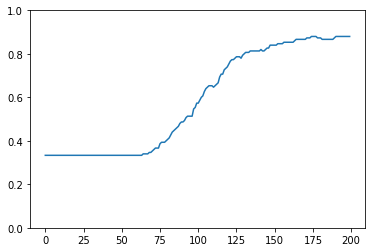

In [109]:
plt.plot(history.history["accuracy"], label="train accuracy")
plt.ylim([0,1])

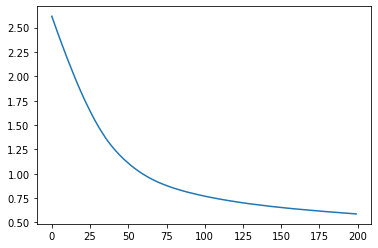

In [110]:
plt.plot(history.history["loss"], label="train loss")

## Simple Deep Lerning Model with Pytorch

In [79]:
from sklearn import datasets
import torch
from torch import nn,optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import numpy as np
import tqdm
iris = datasets.load_iris()

In [80]:
model = nn.Sequential(nn.Linear(4,10),nn.ReLU(),nn.Linear(10,10),nn.ReLU(),nn.Linear(10,3))

In [81]:
X = torch.tensor(iris['data'], dtype=torch.float32)
Y = torch.tensor(iris['target'],dtype=torch.long)
ds = TensorDataset(X,Y)  # tensor가 들어가야 한다.
loader = DataLoader(ds, batch_size=64, shuffle=True)

In [82]:
print(model)

Sequential(
  (0): Linear(in_features=4, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=3, bias=True)
)


In [90]:
loss_fn = nn.CrossEntropyLoss()  # 넘길 때, (N,C), (N,)  <--- one_hot으로 변환하지 않는 target을 넘긴다.
optimizer = optim.Adam(model.parameters(),lr=0.0001)   # tensorflow와 달리 lr=0.0001일 때, 잘된다.

In [97]:
n_epoch = 200

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)
history_loss = []
history_acc  = []
for epoch in range(n_epoch):
    model.train()
    running_loss = []
    acc = 0
    n = 0
    for i,(x,y) in enumerate(loader):
        x = x.to(device)
        y = y.to(device)
        pred = model(x)
        loss = loss_fn(pred,y)
        loss.backward()
        optimizer.step()
        running_loss.append(loss.item())
        _,pred = pred.max(1)
        acc += (pred==y).float().sum().item()
        n += len(y)
    
    history_loss.append(np.mean(running_loss))
    history_acc.append(acc/n)
    print('epoch: {}/{}, loss: {:.4f}, acc: {:.4f}'.format(epoch+1,n_epoch,history_loss[-1],history_acc[-1]))
    

cuda
epoch: 1/200, loss: 0.1489, acc: 0.9667
epoch: 2/200, loss: 0.1497, acc: 0.9667
epoch: 3/200, loss: 0.1626, acc: 0.9667
epoch: 4/200, loss: 0.1507, acc: 0.9667
epoch: 5/200, loss: 0.1465, acc: 0.9667
epoch: 6/200, loss: 0.1593, acc: 0.9667
epoch: 7/200, loss: 0.1584, acc: 0.9667
epoch: 8/200, loss: 0.1540, acc: 0.9667
epoch: 9/200, loss: 0.1605, acc: 0.9667
epoch: 10/200, loss: 0.1578, acc: 0.9667
epoch: 11/200, loss: 0.1576, acc: 0.9667
epoch: 12/200, loss: 0.1543, acc: 0.9667
epoch: 13/200, loss: 0.1471, acc: 0.9667
epoch: 14/200, loss: 0.1497, acc: 0.9667
epoch: 15/200, loss: 0.1559, acc: 0.9667
epoch: 16/200, loss: 0.1424, acc: 0.9667
epoch: 17/200, loss: 0.1627, acc: 0.9667
epoch: 18/200, loss: 0.1659, acc: 0.9667
epoch: 19/200, loss: 0.1505, acc: 0.9667
epoch: 20/200, loss: 0.1694, acc: 0.9667
epoch: 21/200, loss: 0.1697, acc: 0.9667
epoch: 22/200, loss: 0.1446, acc: 0.9667
epoch: 23/200, loss: 0.1492, acc: 0.9667
epoch: 24/200, loss: 0.1486, acc: 0.9667
epoch: 25/200, loss:

(0, 1)

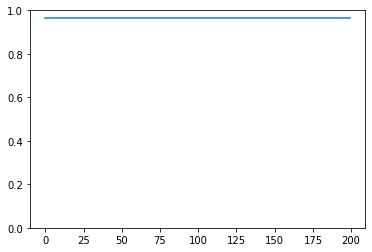

In [95]:
plt.plot(history_acc, label="train accuracy")
plt.ylim([0,1])

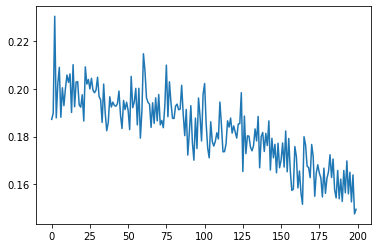

In [96]:
plt.plot(history_loss, label="train accuracy")